# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.


In [832]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import seaborn as sns


1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [833]:
df_archive=pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [834]:
#url link 
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)


file_name = "image-predictions.tsv"
with open(file_name, 'wb') as file:
     file.write(response.content)

#test file 
df_image=pd.read_csv('image-predictions.tsv',sep='\t')
df_image.head(10)
len(df_image)

2075

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [835]:
#pip install tweepy

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [836]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended',wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)
#

In [837]:
df_count = []

with open('tweet-json.txt', 'r') as file:
    for row in file:
        tweet = json.loads(row)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        df_count.append({
            'tweet_id':tweet_id,
            'retweet_count': retweet_count,
            'favorite_count': fav_count,})
        
df_count= pd.DataFrame(df_count)
df_count.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [838]:
#Check tweets table data
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [839]:
#scope of work
#You only want original ratings (no retweets) that have images
df_archive_no_retweets = df_archive[(df_archive['retweeted_status_id'].isnull() & df_archive['expanded_urls'].notnull() )]
df_archive_no_retweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2117 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2117 non-null   object 
 4   source                      2117 non-null   object 
 5   text                        2117 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2117 non-null   int64  
 11  rating_denominator          2117 non-null   int64  
 12  name                        2117 non-null   object 
 13  doggo                       2117 

In [840]:
#A visual assessment of the table
df_archive_no_retweets.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
729,781955203444699136,NaN,NaN,2016-09-30 20:33:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chipson. He weighed in at .3 ounces an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781955203...,11,10,Chipson,None,None,None,None
1327,705975130514706432,NaN,NaN,2016-03-05 04:36:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Adele. Her tongue flies out of her mou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705975130...,10,10,Adele,None,None,pupper,None
631,794205286408003585,NaN,NaN,2016-11-03 15:51:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Laika. She was a space pupper. The fir...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/794205286...,14,10,Laika,None,None,pupper,None
2250,667832474953625600,NaN,NaN,2015-11-20 22:30:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",THE EYES 12/10\n\nI'm sorry. These are suppose...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667832474...,12,10,None,None,None,None,None
1290,708130923141795840,NaN,NaN,2016-03-11 03:22:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending in non canines like this G...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708130923...,11,10,None,None,None,None,None


In [841]:
#Check duplicated for the Tweet id column
df_archive_no_retweets.tweet_id.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352    False
2353    False
2354    False
2355    False
Name: tweet_id, Length: 2117, dtype: bool

In [842]:
#Have a look at Unique Values. And the extent of repetition and if there are illogical values
df_archive_no_retweets.name.value_counts()

None          622
a              55
Lucy           11
Charlie        11
Cooper         10
             ... 
Wishes          1
Rose            1
Theo            1
Fido            1
Christoper      1
Name: name, Length: 956, dtype: int64

In [843]:
#Have a look at the image table structure
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [844]:
#Visual evaluation of the table of pictures
df_image.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
897,699775878809702401,https://pbs.twimg.com/media/CbYac83W4AAUH1O.jpg,1,Dandie_Dinmont,0.271683,True,Old_English_sheepdog,0.164931,True,otterhound,0.105918,True
131,668297328638447616,https://pbs.twimg.com/media/CUZE4IWW4AAZmDf.jpg,1,king_penguin,0.606747,False,ice_bear,0.264221,False,Eskimo_dog,0.032784,True
1931,859074603037188101,https://pbs.twimg.com/media/C-wLyufW0AA546I.jpg,1,revolver,0.190292,False,projectile,0.149064,False,fountain,0.066047,False
1034,711732680602345472,https://pbs.twimg.com/media/CeCVGEbUYAASeY4.jpg,3,dingo,0.366875,False,Ibizan_hound,0.334929,True,Eskimo_dog,0.073876,True
768,689280876073582592,https://pbs.twimg.com/media/CZDRTAPUoAEaqxF.jpg,3,Chihuahua,0.637546,True,American_Staffordshire_terrier,0.150694,True,Staffordshire_bullterrier,0.103953,True
1039,712085617388212225,https://pbs.twimg.com/media/CeHWFksXIAAyypp.jpg,2,Shih-Tzu,0.625129,True,Tibetan_terrier,0.126897,True,Lhasa,0.119663,True
922,702217446468493312,https://pbs.twimg.com/media/Cb7HCMkWEAAV9zY.jpg,1,golden_retriever,0.242419,True,chow,0.226800,True,cocker_spaniel,0.194086,True
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
438,674422304705744896,https://pbs.twimg.com/media/CVwHgblWcAACWOD.jpg,1,golden_retriever,0.964497,True,Labrador_retriever,0.009006,True,tennis_ball,0.007139,False
1252,747963614829678593,https://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg,1,kelpie,0.307672,True,Irish_terrier,0.197486,True,dingo,0.105475,False


In [845]:
#chack that there are no duplicates 
df_image.tweet_id.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2070    False
2071    False
2072    False
2073    False
2074    False
Name: tweet_id, Length: 2075, dtype: bool

In [846]:
# Check the stats count table
df_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [847]:
#visual assessment of the sample
df_count.sample(5)

,tweet_id,retweet_count,favorite_count
110,871032628920680449,3999,23255
975,750011400160841729,1035,3568
820,770093767776997377,3520,0
1254,710588934686908417,2107,4968
649,792883833364439040,4964,12666


In [848]:
#Verify.. that there is no duplicated
df_count.tweet_id.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2349    False
2350    False
2351    False
2352    False
2353    False
Name: tweet_id, Length: 2354, dtype: bool

In [849]:
#For further verification, the two tables have been merged to find out the missing values
df_join = pd.merge(df_archive_no_retweets, df_image, on="tweet_id" ,how="left")

In [850]:
#Look at the table after the merge
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2117 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2117 non-null   object 
 4   source                      2117 non-null   object 
 5   text                        2117 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2117 non-null   int64  
 11  rating_denominator          2117 non-null   int64  
 12  name                        2117 non-null   object 
 13  doggo                       2117 

In [851]:
# Take a look at the table after excluding tweets that do not have an image
df_join[((
    df_join['jpg_url'].notnull()  
    )
)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2116
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1994 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1994 non-null   object 
 4   source                      1994 non-null   object 
 5   text                        1994 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1994 non-null   object 
 10  rating_numerator            1994 non-null   int64  
 11  rating_denominator          1994 non-null   int64  
 12  name                        1994 non-null   object 
 13  doggo                       1994 

In [852]:
#Random sample
df_join.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1600,676263575653122048,NaN,NaN,2015-12-14 04:52:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",All this pupper wanted to do was go skiing. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676263575...,...,1.0,teddy,0.098283,False,toy_poodle,0.098029,True,shopping_basket,0.077852,False
202,845306882940190720,NaN,NaN,2017-03-24 16:10:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pickles. She's a silly pupper. Thinks ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/845306882...,...,1.0,Irish_water_spaniel,0.567475,True,Labrador_retriever,0.169496,True,curly-coated_retriever,0.101518,True
1143,703382836347330562,NaN,NaN,2016-02-27 00:55:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He's a West Side Niddlewog. M...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703382836...,...,2.0,golden_retriever,0.945664,True,standard_poodle,0.014392,True,Tibetan_mastiff,0.012022,True
1841,670840546554966016,NaN,NaN,2015-11-29 05:43:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Colby. He's that one cool friend that get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670840546...,...,1.0,Shih-Tzu,0.963622,True,Lhasa,0.016017,True,guinea_pig,0.007932,False
1687,674269164442398721,NaN,NaN,2015-12-08 16:47:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bob. He's a Juniper Fitzsimmons. His b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674269164...,...,1.0,pug,0.622921,True,Norwegian_elkhound,0.048659,True,Cardigan,0.016966,True


In [853]:
#Check unique values
df_join['rating_denominator'].value_counts()

10     2099
50        3
11        2
80        2
70        1
7         1
150       1
170       1
20        1
90        1
40        1
130       1
110       1
120       1
2         1
Name: rating_denominator, dtype: int64

In [854]:
#Visually check the column for the number of images, as well as the link for the images
df_join[["img_num","jpg_url"]].sort_values(by=['img_num'], ascending=False).head(10)

,img_num,jpg_url
304,4.0,https://pbs.twimg.com/media/C3rN-lcWEAA9CmR.jpg
504,4.0,https://pbs.twimg.com/media/CvukbEkWAAAV-69.jpg
608,4.0,https://pbs.twimg.com/media/Cr2_6R8WAAAUMtc.jpg
283,4.0,https://pbs.twimg.com/media/C4UZLZLWYAA0dcs.jpg
278,4.0,https://pbs.twimg.com/media/C4lst0bXAAE6MP8.jpg
33,4.0,https://pbs.twimg.com/media/DEi_N9qXYAAgEEw.jpg
1315,4.0,https://pbs.twimg.com/media/CZMJYCRVAAE35Wk.jpg
273,4.0,https://pbs.twimg.com/media/C4uLLGuUoAAkIHm.jpg
181,4.0,https://pbs.twimg.com/media/C8m3-iQVoAAETnF.jpg
162,4.0,https://pbs.twimg.com/media/C9px7jyVwAAnmwN.jpg


### Quality issues

#### df_archive

1. We actually have 2117 tweets but the number of tweets that have df_image is 1994 - we have missing values 

2. timestamp  column Object type has to be modified  and tweet_id  column  int64 to  Object

3.  In the Columns of the (name , doggo , flooter, pupper ,puppo), there are values ​​with the name None, which means that they are empty values. The value must be modified and made empty 

4. (retweeted_status_id ,  retweeted_status_user_id , retweeted_status_timestamp ) These columns contain null values. They show retweeted answers being dropped

5. (in_reply_to_status_id  ,in_reply_to_user_id ) Columns contain missing values and do not have and cannot be used. They must be dropped
 
6. (rating_denominator)  column contains a number of 2099 as a result of a value of 10, which is illogical and makes this information useless.

7. (source) column contains redundant and useless data that should be dropped


#### df_image 

8.   jpg_url  column contains only one picture. We show in a column img_num	 that contains more than one picture

### Tidiness issues
1. The table (df_archive , df_image , df_join) must be merged into one table 

2. Merge the data from  (doggo, puppo, pupper, floofer) into a single column. NEW

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [855]:
# Make copies of original pieces of data
#scope of work
#You only want original ratings (no retweets) that have images
#df_archive_new = df_archive[(df_archive['retweeted_status_id'].isnull() & df_archive['expanded_urls'].notnull() )]

#copy data 
df_archive_new = df_archive.copy()

# drop retweeted row 
drop_row = df_archive_new[(df_archive_new['retweeted_status_id'].notnull())].index
df_archive_new.drop(drop_row,  inplace=True)

# drop rows without images
drop_row = df_archive_new[(df_archive_new['expanded_urls'].isnull())].index
df_archive_new.drop(drop_row ,  inplace=True)

#copy image 
df_image_new = df_image.copy()

#copy Likes and retweets counts
df_count_new = df_count.copy()

In [856]:
#chack row  retweeted_
df_archive_new['tweet_id'][(df_archive_new['retweeted_status_id'].notnull())].count()

0

In [857]:
#chack row without images
df_archive_new['tweet_id'][(df_archive_new['expanded_urls'].isnull())].count()

0

In [858]:
#info data 
df_archive_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2117 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2117 non-null   object 
 4   source                      2117 non-null   object 
 5   text                        2117 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2117 non-null   int64  
 11  rating_denominator          2117 non-null   int64  
 12  name                        2117 non-null   object 
 13  doggo                       2117 

### Issue #1:

#### Define  
The table (df_archive , df_image , df_join) must be merged into one table

#### Code

In [859]:
#Merging tables into one table and linking them by Tweet ID
df_Tweet_stats2 =[]
df_Tweet_stats2 = df_archive_new.merge(df_image_new , on="tweet_id" ,how="left")
df_Tweet_stats3 = df_Tweet_stats2.merge( df_count_new , on="tweet_id" ,how="left")

#### Test

In [860]:
#
df_Tweet_stats3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2117 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2117 non-null   object 
 4   source                      2117 non-null   object 
 5   text                        2117 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2117 non-null   int64  
 11  rating_denominator          2117 non-null   int64  
 12  name                        2117 non-null   object 
 13  doggo                       2117 

### Issue #2:  

#### Define   
In the Columns of the (name , doggo , flooter, pupper ,puppo), there are values ​​with the name None, which means that they are empty values. The value must be modified and made empty 

In [861]:
#
Column_None = ["name" , "doggo" , "floofer", "pupper" ,"puppo"]
df_Tweet_stats3[Column_None] = df_Tweet_stats3[Column_None].replace({ "None": np.nan })

#### Code

In [862]:
#
Column_None = ["name" , "doggo" , "floofer", "pupper" ,"puppo"]
df_Tweet_stats3[Column_None] = df_Tweet_stats3[Column_None].replace({ "None": np.nan })

#### Test

In [863]:
if ("None" in set(df_Tweet_stats3[Column_None])) :
    print("recodeing")
else :
    print('done')

done


### Issue #3 :

#### Define 
Merge the data from  (doggo, puppo, pupper, floofer) into a single column (category_dog)

In [864]:
# columns
columns = ['doggo', 'floofer', 'pupper', 'puppo']

# Merge the data from (doggo, puppo, pupper, floofer) into a single column (category_dog)
df_Tweet_stats3['category_dog'] = df_Tweet_stats3[columns].apply(lambda x: ','.join(x.dropna()), axis=1)

#fix null value 
df_Tweet_stats3['category_dog'] = df_Tweet_stats3['category_dog'].replace({ "": np.nan })

#### Test

In [865]:
if(df_Tweet_stats3['category_dog'].count()== (df_Tweet_stats3['doggo'].count()+df_Tweet_stats3['puppo'].count()+df_Tweet_stats3['pupper'].count()+df_Tweet_stats3['floofer'].count())) :
    print("done ")
else :
      print(df_Tweet_stats3['category_dog'].value_counts())

pupper           222
doggo             72
puppo             23
doggo,pupper      10
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: category_dog, dtype: int64


> This is a quality problem,  which is the presence of more than one value for the same line. We will solve it next (doggo,pupper ,doggo,puppo, doggo,floofer )

### Issue #4:

#### Define 
category_dog columns:  This is a quality problem, which is the presence of more than one value for the same line(doggo,pupper doggo,puppo, doggo,floofer) we will drop row 

#### Code

In [866]:
#value drop
category_drop =['doggo,pupper' , 'doggo,puppo' ,'doggo,floofer']

#
category_drop = df_Tweet_stats3[df_Tweet_stats3['category_dog'].isin(category_drop) == True].index

#
df_Tweet_stats3.drop(category_drop ,  inplace=True)

#### Test

In [867]:
#value drop
category_drop =['doggo,pupper' , 'doggo,puppo' ,'doggo,floofer']

if df_Tweet_stats3['category_dog'][df_Tweet_stats3['category_dog'].isin(category_drop)].count() == 0 :
    #Drop columns 'doggo', 'floofer', 'pupper', 'puppo'
    df_Tweet_stats3 = df_Tweet_stats3.drop(columns, axis=1)
    print('done and  Drop columns')
    
else :
    print("recodeing")
    

done and  Drop columns


### Issue #5:

#### Define 
Drop the following columns:  retweeted_status_id , retweeted_status_user_id , retweeted_status_timestamp , jpg_url , in_reply_to_status_id,  in_reply_to_user_id  ,source

#### Code

In [868]:
#Drop columns
drop_list = [ 'retweeted_status_id' , 'retweeted_status_user_id' , 'retweeted_status_timestamp' , 'jpg_url' , 'in_reply_to_status_id',  'in_reply_to_user_id'  ,'source']

df_Tweet_stats3 = df_Tweet_stats3.drop(drop_list, axis=1)

#### Test

In [869]:
#
if set(drop_list).issubset(df_Tweet_stats3.columns):
    print('not working re codeing')
else :  
    df_Tweet_stats3.info()
        

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2105 entries, 0 to 2116
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2105 non-null   int64  
 1   timestamp           2105 non-null   object 
 2   text                2105 non-null   object 
 3   expanded_urls       2105 non-null   object 
 4   rating_numerator    2105 non-null   int64  
 5   rating_denominator  2105 non-null   int64  
 6   name                1490 non-null   object 
 7   img_num             1983 non-null   float64
 8   p1                  1983 non-null   object 
 9   p1_conf             1983 non-null   float64
 10  p1_dog              1983 non-null   object 
 11  p2                  1983 non-null   object 
 12  p2_conf             1983 non-null   float64
 13  p2_dog              1983 non-null   object 
 14  p3                  1983 non-null   object 
 15  p3_conf             1983 non-null   float64
 16  p3_dog

### Issue #6:

#### Define 
Column type  timestamp  to  datetime and p1_dog,p2_dog,p3_dog to bool and tweet_id to  object 

#### Code

In [870]:
#
to_bool =  [ 'p1_dog','p2_dog','p3_dog' ]
to_timestamp = 'timestamp'

df_Tweet_stats3[to_bool] = df_Tweet_stats3[to_bool].astype('bool')
df_Tweet_stats3[to_timestamp] = pd.to_datetime(df_Tweet_stats3[to_timestamp])
df_Tweet_stats3['tweet_id'] = df_Tweet_stats3['tweet_id'].astype('object')


 

#### Test

In [871]:
if df_Tweet_stats3[to_bool[0]].dtypes == 'bool' :
    print('done')
if df_Tweet_stats3[to_bool[1]].dtypes == 'bool' :
    print('done')
if df_Tweet_stats3[to_bool[2]].dtypes == 'bool' :
    print('done')
if df_Tweet_stats3[to_timestamp].dtypes == 'datetime64[ns, UTC]' :
    print('done')
if df_Tweet_stats3['tweet_id'].dtypes == 'object' :
    print('done')


done
done
done
done
done


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [872]:
df_Tweet_stats3.to_csv('Twitter_archive_master.csv')
Twitter_archive_master=pd.read_csv('Twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [873]:
## 
Twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2105 non-null   int64  
 1   tweet_id            2105 non-null   int64  
 2   timestamp           2105 non-null   object 
 3   text                2105 non-null   object 
 4   expanded_urls       2105 non-null   object 
 5   rating_numerator    2105 non-null   int64  
 6   rating_denominator  2105 non-null   int64  
 7   name                1490 non-null   object 
 8   img_num             1983 non-null   float64
 9   p1                  1983 non-null   object 
 10  p1_conf             1983 non-null   float64
 11  p1_dog              2105 non-null   bool   
 12  p2                  1983 non-null   object 
 13  p2_conf             1983 non-null   float64
 14  p2_dog              2105 non-null   bool   
 15  p3                  1983 non-null   object 
 16  p3_con

In [874]:
#After converting the dataframe into a file, you must re-assign the columns  types again.
to_bool =  [ 'p1_dog','p2_dog','p3_dog' ]
to_timestamp = 'timestamp'

Twitter_archive_master[to_bool] = Twitter_archive_master[to_bool].astype('bool')
Twitter_archive_master[to_timestamp] = pd.to_datetime(Twitter_archive_master[to_timestamp])
Twitter_archive_master['tweet_id'] = Twitter_archive_master['tweet_id'].astype('object')

In [875]:
#
Twitter_archive_master.describe()

,Unnamed: 0,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2105.000000,2105.000000,2105.000000,1983.000000,1983.000000,1.983000e+03,1.983000e+03,2105.000000,2105.000000
mean,1061.045131,12.251781,10.504038,1.203732,0.593112,1.346413e-01,6.034123e-02,2813.222328,8899.322565
std,611.422625,40.389622,7.125979,0.561861,0.271886,1.007247e-01,5.089379e-02,4679.003717,12134.186049
min,0.000000,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,81.000000
25%,532.000000,10.000000,10.000000,1.000000,0.362715,5.417505e-02,1.624950e-02,636.000000,2040.000000
50%,1064.000000,11.000000,10.000000,1.000000,0.587342,1.176080e-01,4.965610e-02,1383.000000,4162.000000
75%,1590.000000,12.000000,10.000000,1.000000,0.843635,1.953115e-01,9.158675e-02,3261.000000,11332.000000
max,2116.000000,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


### Insights: 

#### nsights 1:  
Do you interact with tweets more by retweeting or favorite?

In [876]:
#sum of your favorites and retweets
Twitter_sum =Twitter_archive_master[['retweet_count','favorite_count']].sum()
Twitter_sum

retweet_count      5921833
favorite_count    18733074
dtype: int64

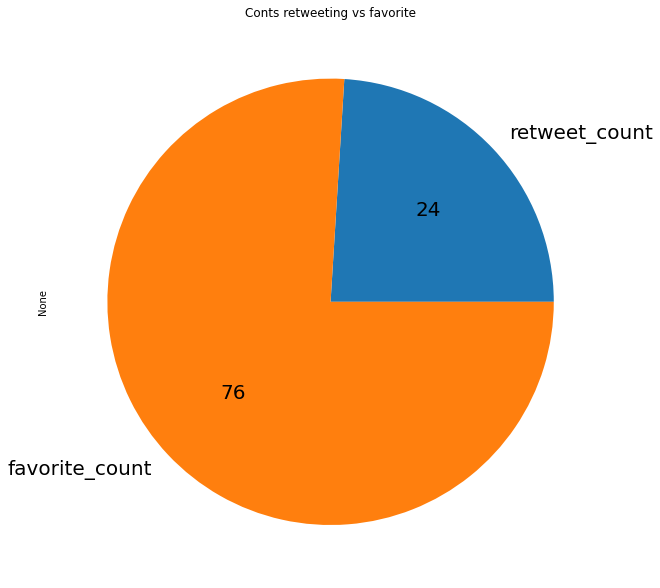

In [877]:
pie = Twitter_sum.plot(kind='pie',fontsize=20, legend=False, autopct='%.f', subplots=False, figsize=(10,12),title='Conts retweeting vs favorite', y='counts')

> It shows us that favorites is more than retweeting by a large margin

#### nsights 2:  
What are the most 10 common dog breeds in machine learning?

In [878]:

dogs_type_best_p = []
dogs_type = Twitter_archive_master
dogs_type = dogs_type.reset_index()
for index, row in dogs_type.iterrows():
    if row['p1_dog'] == True :
     dogs_type_best_p.append({
            'tweet_id':row['tweet_id'],
            'dog_type': row['p1']})
    elif row['p2_dog'] == True :
     dogs_type_best_p.append({
            'tweet_id':row['tweet_id'],
            'dog_type': row['p2']})
    elif row['p3_dog'] == True :
     dogs_type_best_p.append({
            'tweet_id':row['tweet_id'],
            'dog_type': row['p3']})

dogs_type_best_p= pd.DataFrame(dogs_type_best_p)

In [879]:
dogs_type = dogs_type.merge( dogs_type_best_p , on="tweet_id" ,how="left")

In [880]:
hist_dog_hist = dogs_type.dog_type.value_counts()

In [881]:
hist_dog_hist= pd.DataFrame(hist_dog_hist)

<AxesSubplot:title={'center':'10 common dog breeds in machine learning'}>

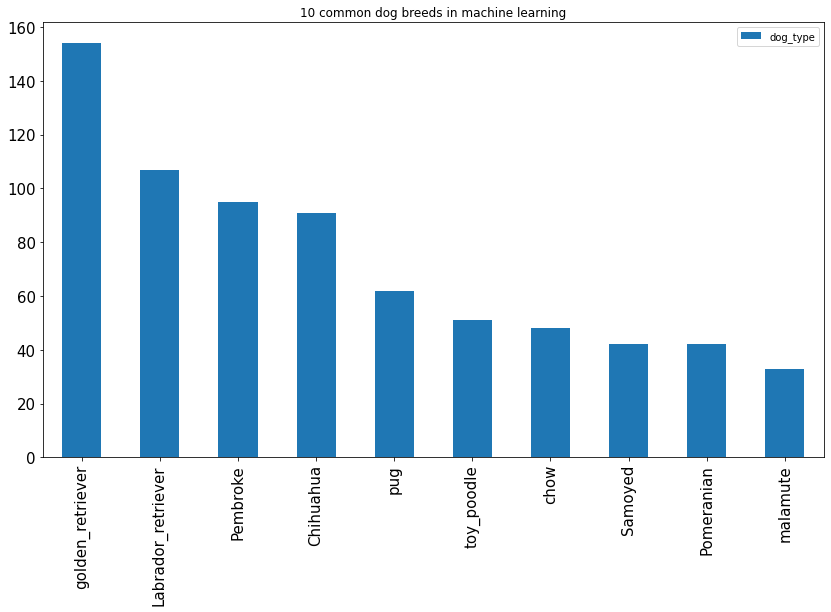

In [882]:
hist_dog_hist.iloc[:10 ].plot(kind='bar', fontsize=15,figsize=(14,8),title='10 common dog breeds in machine learning' )

#### nsights 3:  
Are the tweets with videos more interactive than other tweets?

In [883]:
#Photo Tweets
twitter_photo = Twitter_archive_master[Twitter_archive_master['expanded_urls'].str.contains("video")!=True]
#Video Tweets
twitter_video = Twitter_archive_master[Twitter_archive_master['expanded_urls'].str.contains("video")==True]


In [884]:
twitter_photo[['expanded_urls','name','retweet_count','favorite_count']].describe()

,retweet_count,favorite_count
count,2032.000000,2032.000000
mean,2581.029528,8483.309055
std,3678.925470,11032.480126
min,16.000000,81.000000
25%,620.750000,1978.500000
50%,1359.500000,4053.500000
75%,3154.000000,11075.500000
max,48265.000000,132810.000000


In [885]:
twitter_video[['expanded_urls','name','retweet_count','favorite_count']].describe()

,retweet_count,favorite_count
count,73.000000,73.000000
mean,9276.452055,20479.315068
std,14632.284991,26988.841923
min,388.000000,934.000000
25%,1224.000000,3047.000000
50%,3285.000000,9555.000000
75%,9907.000000,25057.000000
max,79515.000000,131075.000000


>Through the previous results, it is clear that interaction with tweets that contain video  is more than that of images

### Visualization

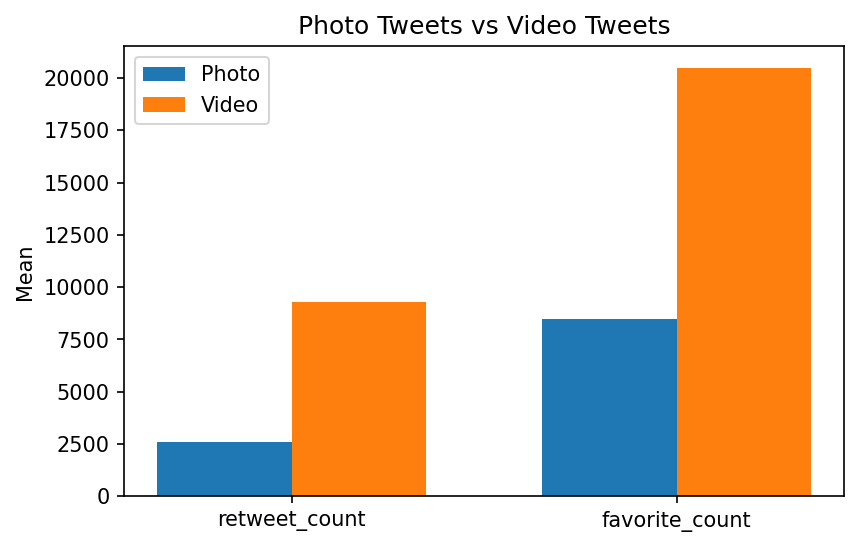

In [886]:

# mean photo retweet_count favorite_count 
photo_mean = twitter_photo[['retweet_count','favorite_count']].mean()

# mean video retweet_count favorite_count
video_mean = twitter_video[['retweet_count','favorite_count']].mean()
names = ['retweet_count','favorite_count']

fig = plt.figure(figsize=(6,5), dpi=150)
left, bottom, width, height = 0.1, 0.3, 0.8, 0.6
ax = fig.add_axes([left, bottom, width, height]) 
 
width = 0.35   
ticks = np.arange(len(names))    
ax.bar(ticks, photo_mean, width, label='Photo')
ax.bar(ticks + width, video_mean, width, align="center",label='Video')

ax.set_ylabel('Mean')
ax.set_title('Photo Tweets vs Video Tweets')
ax.set_xticks(ticks + width/2)
ax.set_xticklabels(names)

ax.legend(loc='best')
plt.show()

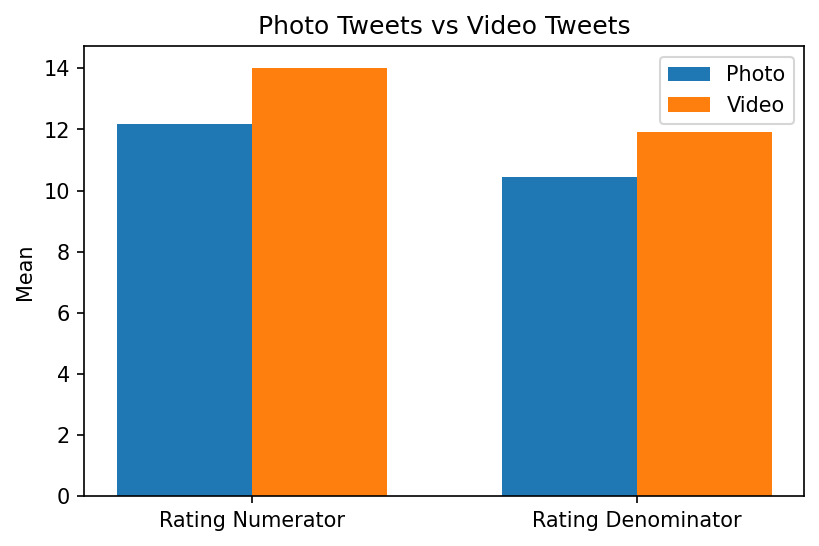

In [887]:
# mean photo Rating Numerator Rating Denominator
photo_mean = twitter_photo[['rating_numerator','rating_denominator']].mean()

# mean video Rating Numerator Rating Denominator
video_mean = twitter_video[['rating_numerator','rating_denominator']].mean()
names = ['Rating Numerator','Rating Denominator']

fig = plt.figure(figsize=(6,5), dpi=150)
left, bottom, width, height = 0.1, 0.3, 0.8, 0.6
ax = fig.add_axes([left, bottom, width, height]) 
 
width = 0.35   
ticks = np.arange(len(names))    
ax.bar(ticks, photo_mean, width, label='Photo')
ax.bar(ticks + width, video_mean, width, align="center",label='Video')

ax.set_ylabel('Mean')
ax.set_title('Photo Tweets vs Video Tweets')
ax.set_xticks(ticks + width/2)
ax.set_xticklabels(names)

ax.legend(loc='best')
plt.show()